In [1]:
import numpy as np
import NUTS as hmc
import hmc as hmc2
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)*100
inv_cov = np.linalg.inv(cov)
print(cov)


[[ 1.02303292 -0.73200169 -0.81611598]
 [-0.73200169  1.27217225  1.1844982 ]
 [-0.81611598  1.1844982   2.32810959]]


In [3]:
def mock_posterior_and_gradient(p):
    grad = -p @ inv_cov
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * grad @ p.T
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, grad

In [4]:
def run_hmc(n_it, hmc, cov, burnin):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.NUTS(fid_params, 0.6, n_it, burnin)

    return sampler

In [5]:
def run_hmc2(n_it, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    return sampler

In [6]:
nit = 10000
burnin = 1000

start = time.time()
chain = run_hmc(nit, hmc, cov, burnin)
print("%.2f" %(time.time()-start))

start = time.time()
chain2 = run_hmc2(nit, 0.02, hmc2, 50, cov)
print("%.2f" %(time.time()-start))

2.0
Reasonable epsilon is 2.0
220
440
660
880
1100
1320
1540
1760
1980
2200
2420
2640
2860
3080
3300
3520
3740
3960
4180
4400
4620
4840
5060
5280
5500
5720
5940
6160
6380
6600
6820
7040
7260
7480
7700
7920
8140
8360
8580
8800
9020
9240
9460
9680
9900
10120
10340
10560
10780
5.60
Accept 0 alpha=1.00  p=0.32  ΔH=0.000
Accept 200 alpha=1.00  p=0.51  ΔH=-0.000
Accept 400 alpha=1.00  p=0.43  ΔH=-0.000
Accept 600 alpha=1.00  p=0.36  ΔH=0.000
Accept 800 alpha=1.00  p=0.56  ΔH=0.000
Accept 1000 alpha=1.00  p=0.22  ΔH=0.000
Accept 1200 alpha=1.00  p=0.74  ΔH=-0.000
Accept 1400 alpha=1.00  p=0.91  ΔH=0.000
Accept 1600 alpha=1.00  p=0.38  ΔH=-0.000
Accept 1800 alpha=1.00  p=0.52  ΔH=-0.000
Accept 2000 alpha=1.00  p=0.58  ΔH=0.000
Accept 2200 alpha=1.00  p=0.38  ΔH=0.000
Accept 2400 alpha=1.00  p=0.04  ΔH=0.000
Accept 2600 alpha=1.00  p=0.20  ΔH=0.000
Accept 2800 alpha=1.00  p=0.68  ΔH=0.000
Accept 3000 alpha=1.00  p=0.40  ΔH=0.000
Accept 3200 alpha=1.00  p=0.90  ΔH=0.000
Accept 3400 alpha=1.00  p

In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)

trace = np.array(chain.trace)
calls = np.array(chain.ncall_list)

#print(trace)

print(trace.shape)
print(calls.shape)

trace2 = np.array(chain2.trace)
calls2 = np.array(chain2.ncall_list)
print(trace2.shape)
print(calls2.shape)

(9348, 3)
(9348,)
(10000, 3)
(10000,)


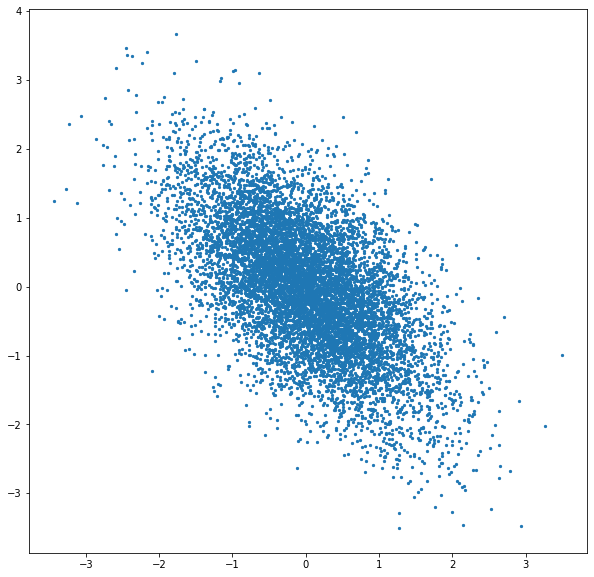

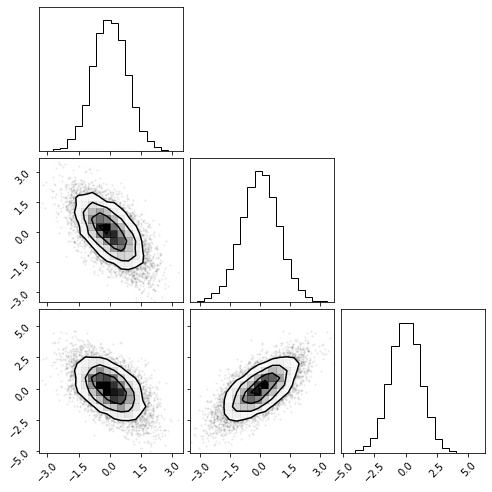

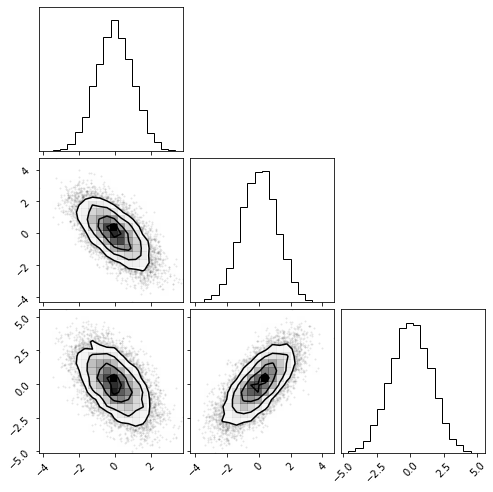

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.scatter(trace2[:,0],trace2[:,1],s=5)
plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [9]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    #plt.ylim(botlim,toplim)
    
    #print(np.std(trace[:,dim]))
    

<ipython-input-10-93b47e9ea3d1>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[1.0114509         nan        nan]
 [       nan 1.12790613 1.08834654]
 [       nan 1.08834654 1.5258144 ]]


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


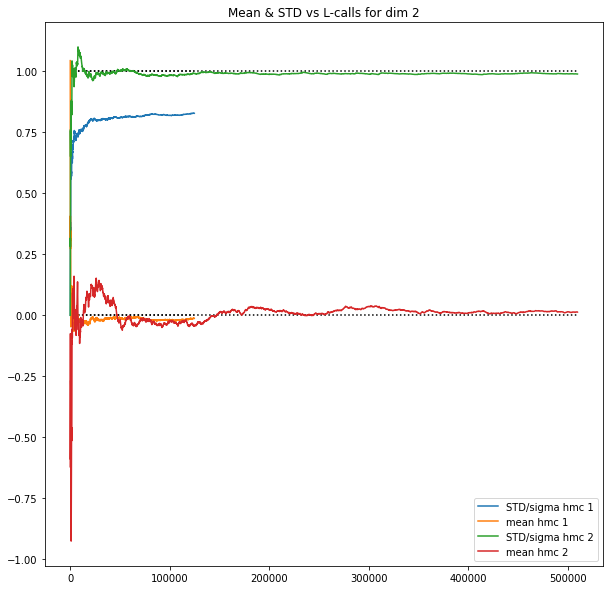

In [10]:
print(np.sqrt(cov))

plot_conv(trace,2,-1,1.5,1, cov, calls)
plot_conv(trace2,2,-1,1.5,2, cov, calls2)
plt.show()